# MNIST v4

In [1]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

random_seed = 20181401
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

display = display if "display" in vars(__builtins__) else print
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
learning_rate = 0.00001
training_epochs = 24
batch_size = 32

In [3]:
mnist_train_dataset = datasets.MNIST(root="datasets/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test_dataset = datasets.MNIST(root="datasets/", train=False, transform=transforms.ToTensor(), download=True)
mnist_train_loader = DataLoader(mnist_train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)
mnist_test_loader = DataLoader(mnist_test_dataset, batch_size=batch_size, drop_last=True)

In [4]:
class MNISTCNN(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Sequential(
      nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(32),
      nn.PReLU(),
      nn.MaxPool2d(2)
    )
    self.layer2 = nn.Sequential(
      nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
      nn.BatchNorm2d(64),
      nn.PReLU(),
      nn.MaxPool2d(2)
    )
    self.layer3 = nn.Sequential(
      nn.Linear(64 * 7 * 7, 32 * 7 * 7),
      nn.BatchNorm1d(32 * 7 * 7),
      nn.PReLU(),
      nn.Dropout(0.5),
      nn.Linear(32 * 7 * 7, 10)
    )
  
  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = out.view(out.shape[0], -1)
    out = self.layer3(out)
    return out


In [5]:
model = MNISTCNN().to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [6]:
def calculate_accurancy():
  with torch.no_grad():
    model.eval()
    accurancy = 0

    for x, y in mnist_test_loader:
      assert isinstance(x, torch.Tensor)
      assert isinstance(y, torch.Tensor)
      x = x.to(device)
      y = y.to(device)

      hypothesis = model(x)
      prediction = torch.argmax(hypothesis, dim=1)
      accurancy += (prediction == y).float().mean().item() / len(mnist_test_loader)
    
    return accurancy

In [7]:
display("epoch 0 / accurancy {:.3f}%".format(calculate_accurancy() * 100))

for epoch in range(training_epochs):
  avg_cost = 0

  for x, y in mnist_train_loader:
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    model.train()
    x = x.to(device)
    y = y.to(device)

    hypothesis = model(x)
    cost = criterion(hypothesis, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    avg_cost += cost.item() / len(mnist_train_loader)
  
  display("epoch {} / cost {} / accurancy {:.3f}%".format(epoch + 1, avg_cost, calculate_accurancy() * 100))

'epoch 0 / accurancy 10.647%'

'epoch 1 / cost 0.3137368758360552 / accurancy 97.306%'

'epoch 2 / cost 0.11045570310205217 / accurancy 98.057%'

'epoch 3 / cost 0.07609644070367005 / accurancy 98.508%'

'epoch 4 / cost 0.06016178329338635 / accurancy 98.688%'

'epoch 5 / cost 0.05046058383174244 / accurancy 98.678%'

'epoch 6 / cost 0.043346084362330596 / accurancy 98.868%'

'epoch 7 / cost 0.0375958772236481 / accurancy 98.798%'

'epoch 8 / cost 0.03412751368874067 / accurancy 98.978%'

'epoch 9 / cost 0.02970640771385909 / accurancy 98.928%'

'epoch 10 / cost 0.026414841006572046 / accurancy 98.908%'

'epoch 11 / cost 0.024268607989915997 / accurancy 98.978%'

'epoch 12 / cost 0.020887981468004496 / accurancy 98.958%'

'epoch 13 / cost 0.019844429694209263 / accurancy 99.038%'

'epoch 14 / cost 0.017451343872506818 / accurancy 98.998%'

'epoch 15 / cost 0.01563584086373447 / accurancy 99.018%'

'epoch 16 / cost 0.013760119531551972 / accurancy 98.908%'

'epoch 17 / cost 0.013211939141992458 / accurancy 99.058%'

'epoch 18 / cost 0.01206610291463634 / accurancy 99.048%'

'epoch 19 / cost 0.011149216230361093 / accurancy 99.028%'

'epoch 20 / cost 0.00949308582316929 / accurancy 99.069%'

'epoch 21 / cost 0.00914294414710796 / accurancy 98.978%'

'epoch 22 / cost 0.008404712250696791 / accurancy 99.048%'

'epoch 23 / cost 0.007693658033354835 / accurancy 99.048%'

'epoch 24 / cost 0.007477492553760144 / accurancy 99.139%'

'label 9 / prediction 9 (99.998%)'

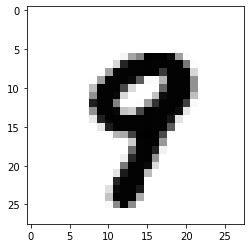

'label 3 / prediction 3 (99.999%)'

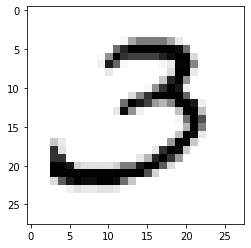

'label 4 / prediction 4 (100.000%)'

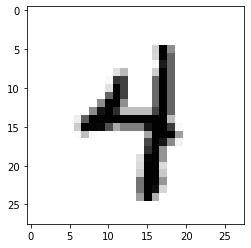

'label 6 / prediction 6 (100.000%)'

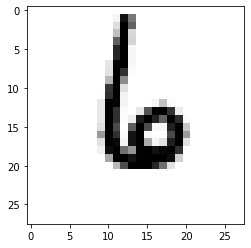

'label 9 / prediction 9 (100.000%)'

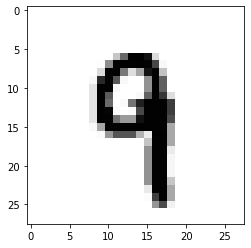

'label 6 / prediction 6 (99.997%)'

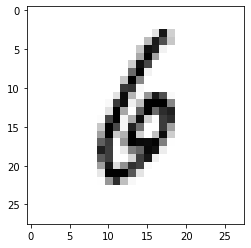

'label 1 / prediction 1 (99.996%)'

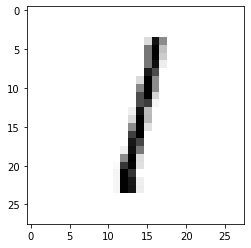

'label 0 / prediction 0 (99.999%)'

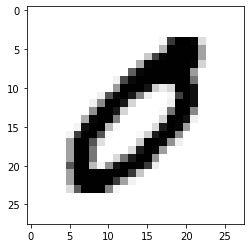

'label 4 / prediction 4 (99.999%)'

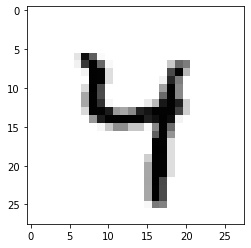

'label 0 / prediction 0 (99.999%)'

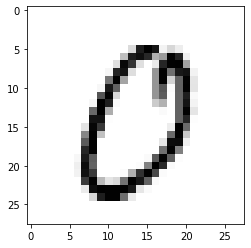

'label 9 / prediction 9 (100.000%)'

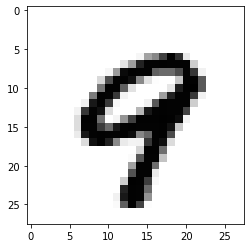

'label 6 / prediction 6 (99.993%)'

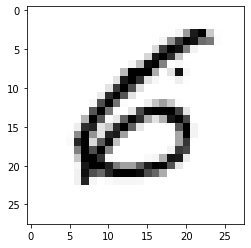

'label 4 / prediction 4 (95.958%)'

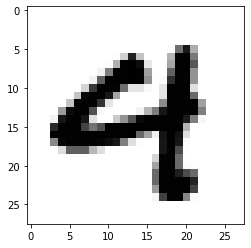

'label 7 / prediction 7 (99.990%)'

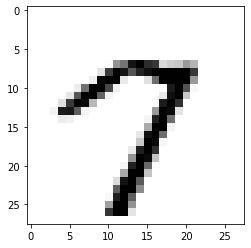

'label 7 / prediction 7 (99.994%)'

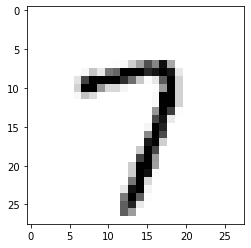

'label 5 / prediction 5 (99.999%)'

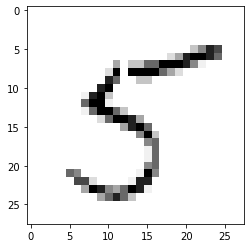

'label 3 / prediction 3 (100.000%)'

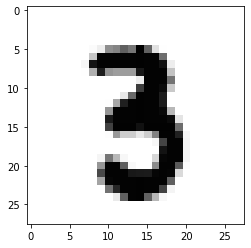

'label 6 / prediction 6 (99.958%)'

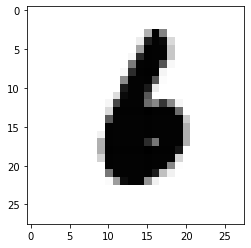

'label 6 / prediction 6 (99.995%)'

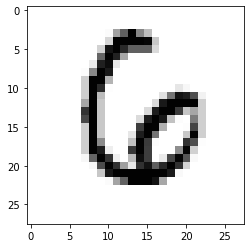

'label 2 / prediction 2 (99.996%)'

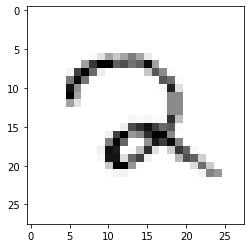

'label 1 / prediction 1 (99.997%)'

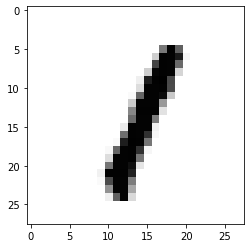

'label 3 / prediction 3 (100.000%)'

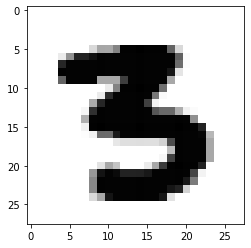

'label 0 / prediction 0 (99.973%)'

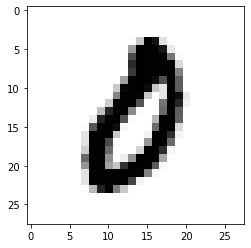

'label 4 / prediction 4 (100.000%)'

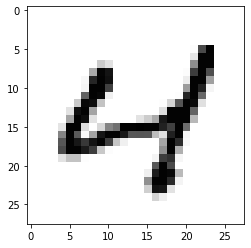

'label 8 / prediction 8 (100.000%)'

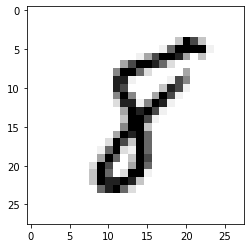

'label 2 / prediction 2 (99.989%)'

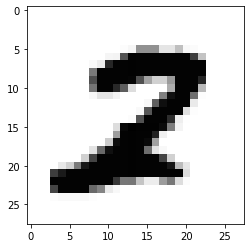

'label 5 / prediction 5 (99.994%)'

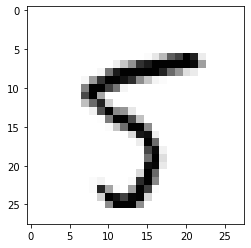

'label 5 / prediction 5 (100.000%)'

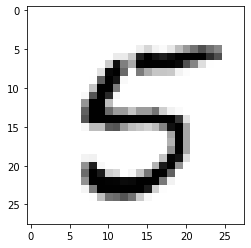

'label 5 / prediction 5 (99.943%)'

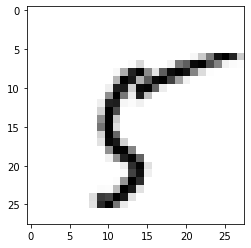

'label 1 / prediction 1 (99.995%)'

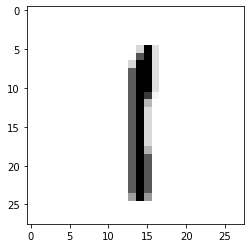

'label 1 / prediction 1 (99.988%)'

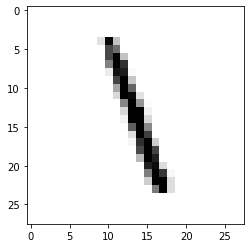

'label 9 / prediction 9 (99.997%)'

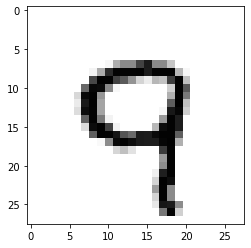

'label 4 / prediction 4 (99.996%)'

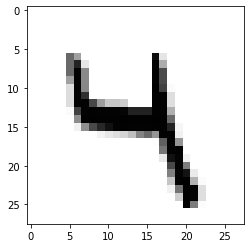

'label 9 / prediction 9 (99.270%)'

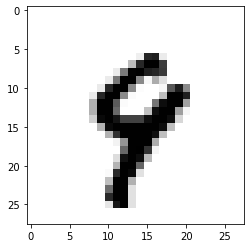

'label 7 / prediction 7 (99.993%)'

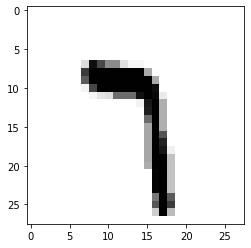

'label 9 / prediction 9 (99.999%)'

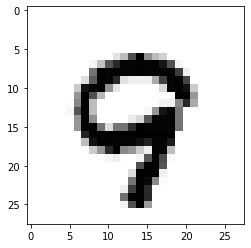

'label 0 / prediction 0 (99.994%)'

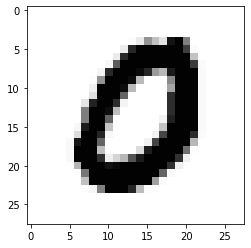

'label 3 / prediction 3 (100.000%)'

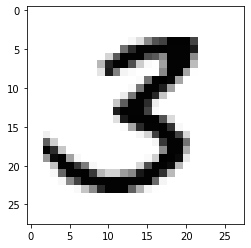

'label 1 / prediction 1 (99.990%)'

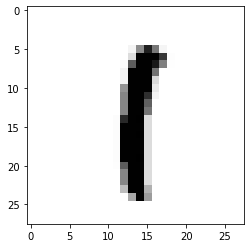

'label 7 / prediction 7 (99.995%)'

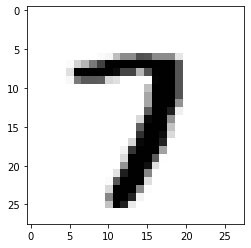

'label 2 / prediction 2 (99.999%)'

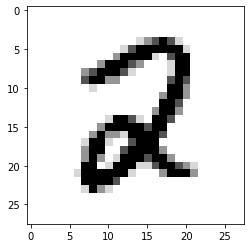

'label 8 / prediction 8 (99.992%)'

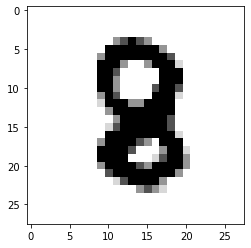

'label 5 / prediction 5 (99.368%)'

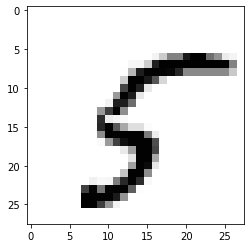

'label 0 / prediction 0 (99.815%)'

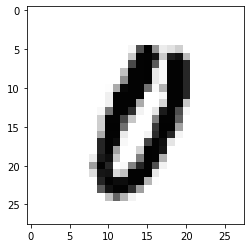

'label 5 / prediction 5 (100.000%)'

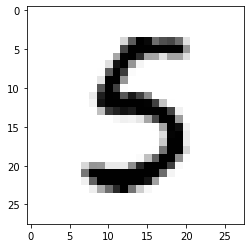

'label 0 / prediction 0 (99.960%)'

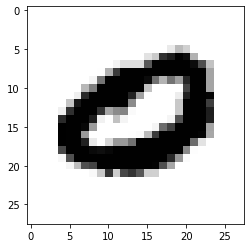

'label 9 / prediction 9 (99.995%)'

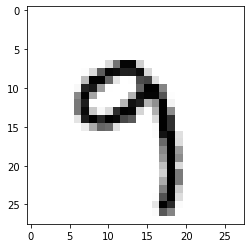

'label 0 / prediction 0 (99.999%)'

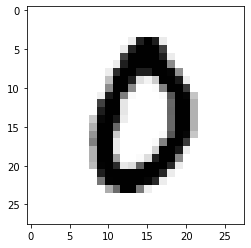

'label 6 / prediction 6 (99.988%)'

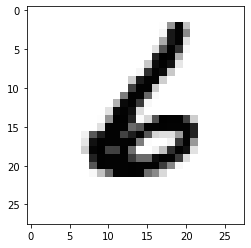

'label 1 / prediction 1 (99.999%)'

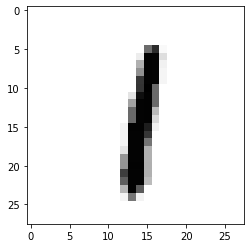

In [8]:
with torch.no_grad():
  model.eval()
  
  for x, y in itertools.islice(DataLoader(mnist_test_dataset, batch_size=1, shuffle=True), 50):
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.to(device)
    y = y.to(device)

    hypothesis = model(x)
    prediction = torch.argmax(hypothesis, dim=1).item()
    prediction_percent = torch.softmax(hypothesis, dim=1).max(dim=1)[0].item() * 100

    display("label {} / prediction {} ({:.3f}%)".format(y.item(), prediction, prediction_percent))
    plt.imshow(x.cpu().view(28, 28), cmap=plt.cm.Greys, interpolation="nearest")
    plt.show()